<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

In [ ]:
import pickle

In [ ]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import roc_curve,auc

import tqdm as tqdm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Decision Tree**

**1.1 Loading Data**

In [ ]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)

In [ ]:
X=data.drop(['project_is_approved'],axis=1)
Y= data['project_is_approved']

In [ ]:
X.shape,Y.shape

((50000, 8), (50000,))

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=23,stratify=Y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37500, 8), (12500, 8), (37500,), (12500,))

In [ ]:
categorical= x_train.select_dtypes(np.object)
categorical=categorical.drop(['essay'],axis=1).columns.values
print(categorical)

text=['essay']
print(text)

numerical= x_train.select_dtypes([np.float64,np.int64]).columns.values
print(numerical)

['school_state' 'teacher_prefix' 'project_grade_category'
 'clean_categories' 'clean_subcategories']
['essay']
['teacher_number_of_previously_posted_projects' 'price']


**TFIDF on TEXT DATA**

In [ ]:
vec_essay= TfidfVectorizer(min_df=10)


x_essay_train_tfidf= vec_essay.fit_transform(x_train['essay'].values)
print(x_essay_train_tfidf.shape)

x_essay_test_tfidf= vec_essay.transform(x_test['essay'].values)
print(x_essay_test_tfidf.shape)

(37500, 10850)
(12500, 10850)


In [ ]:
x_essay_train_tfidf

<37500x10850 sparse matrix of type '<class 'numpy.float64'>'
	with 4018910 stored elements in Compressed Sparse Row format>

**TFIDFW2V on TEXT DATA**

In [ ]:
tfidf_model= TfidfVectorizer()
tfidf_model.fit(x_train['essay'].values)

dictionary= dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_words= set(tfidf_model.get_feature_names())

In [ ]:
def tfidf_w2v(a):
  tfidf_w2v_vectors=[]
  for sentence in a:
    vector= np.zeros(300)
    tfidf_weight=0
    for word in sentence:
      if (word in glove_words) and (word in tfidf_words):
        vec= model[word]
        tfidf= dictionary[word]* (sentence.count(word)/len(sentence.split()))
        vector+= tfidf* vec
        tfidf_weight+= tfidf
    
    if tfidf_weight!=0:
      vector/=tfidf_weight
    tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors

In [ ]:
tfidf_w2v_train= np.array(tfidf_w2v(x_train['essay'].values))
tfidf_w2v_test= np.array(tfidf_w2v(x_test['essay'].values))

**ENCODING CATEGORICAL DATA**

Encoding TeacherPrefix

In [ ]:
lis= list(set(x_train['teacher_prefix']))

vec_teacher_prefix = CountVectorizer(vocabulary=lis,lowercase=False, binary=True)


teacher_prefix_train= vec_teacher_prefix.fit_transform(x_train['teacher_prefix'].values)
print(teacher_prefix_train.shape)

teacher_prefix_test= vec_teacher_prefix.transform(x_test['teacher_prefix'].values)
print(teacher_prefix_test.shape)

(37500, 5)
(12500, 5)


Encoding SchoolState

In [ ]:
lis= list(set(x_train['school_state']))

vec_school_state = CountVectorizer(vocabulary=lis,lowercase=False, binary=True)


school_state_train= vec_school_state.fit_transform(x_train['school_state'].values)
school_state_test= vec_school_state.transform(x_test['school_state'].values)

print(school_state_train.shape)
print(school_state_test.shape)
  

(37500, 51)
(12500, 51)


ENCODING PROJECT GRADE CATEGORY

In [ ]:
lis= list(set(x_train['project_grade_category']))

vec_project_grade_category = CountVectorizer(vocabulary=lis,lowercase=False, binary=True)


project_grade_category_train = vec_project_grade_category.fit_transform(x_train['project_grade_category'].values)
project_grade_category_test = vec_project_grade_category.transform(x_test['project_grade_category'].values)

print(project_grade_category_train.shape)
print(project_grade_category_test.shape)

(37500, 4)
(12500, 4)


ENCODING CLEAN CATEGORIES

In [ ]:
lis= list(set(x_train['clean_categories']))
print(lis)

vec_clean_categories = CountVectorizer(vocabulary=lis,lowercase=False, binary=True)


clean_category_train= vec_clean_categories.fit_transform(x_train['clean_categories'].values)
clean_category_test= vec_clean_categories.transform(x_test['clean_categories'].values)

print(clean_category_train.shape)
print(clean_category_test.shape)


['health_sports appliedlearning', 'literacy_language health_sports', 'appliedlearning', 'math_science', 'specialneeds', 'history_civics music_arts', 'music_arts appliedlearning', 'health_sports specialneeds', 'math_science appliedlearning', 'appliedlearning history_civics', 'history_civics specialneeds', 'history_civics', 'appliedlearning math_science', 'math_science health_sports', 'appliedlearning health_sports', 'health_sports history_civics', 'history_civics literacy_language', 'literacy_language math_science', 'literacy_language', 'health_sports warmth care_hunger', 'appliedlearning specialneeds', 'health_sports', 'math_science music_arts', 'literacy_language history_civics', 'specialneeds health_sports', 'appliedlearning literacy_language', 'history_civics appliedlearning', 'history_civics health_sports', 'history_civics math_science', 'music_arts specialneeds', 'music_arts history_civics', 'math_science literacy_language', 'music_arts health_sports', 'music_arts', 'math_science 

ENCODING CLEAN SUBCATEGORIES

In [ ]:
lis= list(set(x_train['clean_subcategories']))

vec_clean_subcategories = CountVectorizer(vocabulary=lis,lowercase=False, binary=True)


clean_subcategory_train= vec_clean_subcategories.fit_transform(x_train['clean_subcategories'].values)
clean_subcategory_test= vec_clean_subcategories.transform(x_test['clean_subcategories'].values)

print(clean_subcategory_train.shape)
print(clean_subcategory_test.shape)


(37500, 341)
(12500, 341)


**ENCODING NUMERICAL FEATURE**

Normalizing teacher_number_of_previously_posted_projects

In [ ]:
normalizer= Normalizer()
teacher_number_of_previously_posted_projects_train= normalizer.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_number_of_previously_posted_projects_test= normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print(teacher_number_of_previously_posted_projects_train.shape)

(37500, 1)


Normalizing Price

In [ ]:
normalizer= Normalizer()
price_scaled_train= normalizer.fit_transform(x_train['price'].values.reshape(-1,1))
price_scaled_test=  normalizer.transform(x_test['price'].values.reshape(-1,1))


print(price_scaled_train.shape)

(37500, 1)


In [ ]:
sid = SentimentIntensityAnalyzer()
def sentiment_score(text):
  sentiment_score=[]
  for sentence in text:
    score= sid.polarity_scores(sentence)
    sentiment_score.append(score)
  return sentiment_score


In [ ]:
sentiment_score_train= np.array(pd.DataFrame(sentiment_score(x_train['essay'].values)))
sentiment_score_test= np.array(pd.DataFrame(sentiment_score(x_test['essay'].values)))

In [ ]:
sentiment_score_train

array([[0.06  , 0.786 , 0.154 , 0.9179],
       [0.042 , 0.717 , 0.241 , 0.9906],
       [0.051 , 0.794 , 0.155 , 0.9231],
       ...,
       [0.076 , 0.617 , 0.307 , 0.9966],
       [0.019 , 0.636 , 0.345 , 0.9949],
       [0.022 , 0.628 , 0.35  , 0.9901]])

In [ ]:
print(sentiment_score_train.shape)
print(sentiment_score_test.shape)


(37500, 4)
(12500, 4)


In [ ]:
x_train_set1= hstack((x_essay_train_tfidf,school_state_train,teacher_prefix_train,project_grade_category_train,clean_category_train,clean_subcategory_train,teacher_number_of_previously_posted_projects_train,price_scaled_train,sentiment_score_train))


In [ ]:
x_test_set1= hstack((x_essay_test_tfidf,school_state_test,teacher_prefix_test,project_grade_category_test,clean_category_test,clean_subcategory_test,teacher_number_of_previously_posted_projects_test,price_scaled_test,sentiment_score_test))

In [ ]:
classifier= DecisionTreeClassifier()
param= {"max_depth":[1,3,10,30],"min_samples_split":[5,10,100,500]}
gsv= GridSearchCV(estimator= classifier, param_grid=param, cv=5,n_jobs=-1, scoring= 'roc_auc')
gsv.fit(x_train_set1,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='roc_auc')

In [ ]:
gsv.best_params_

{'max_depth': 10, 'min_samples_split': 500}

Text(0.5, 1.0, 'AUC Score')

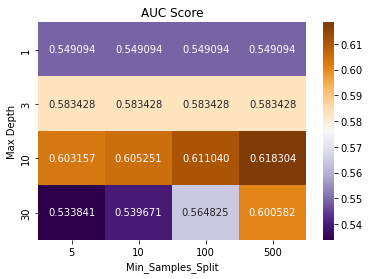

In [ ]:
result= pd.DataFrame(gsv.cv_results_)
res= result[['param_max_depth','param_min_samples_split','mean_test_score']]
score=np.array(res['mean_test_score']).reshape(4,4)
ax= plt.subplot()
sns.heatmap(score,annot= True, fmt="f",cmap='PuOr_r',xticklabels=[5,10,100,500],yticklabels=[1,3,10,30],ax=ax)
ax.set_xlabel("Min_Samples_Split")
ax.set_ylabel("Max Depth")
ax.set_title("AUC Score")

In [ ]:
clf= DecisionTreeClassifier(max_depth=10,min_samples_split=500, random_state=20)
clf.fit(x_train_set1,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500, random_state=20)

In [ ]:
y_pred_train= clf.predict(x_train_set1)
fpr_train,tpr_train,threshold= roc_curve(y_train,y_pred_train)
auc_score_train= auc(fpr_train,tpr_train)
print(auc_score_train)

0.5519617522520195


In [ ]:
temp= np.multiply(tpr_train,np.subtract(1,fpr_train))
index= np.argmax(temp)
best_threshold= threshold[index]

In [ ]:
y_pred= clf.predict(x_test_set1)
fpr,tpr,threshold= roc_curve(y_test,y_pred)
auc_score= auc(fpr,tpr)
print(auc_score)

0.515754820527158


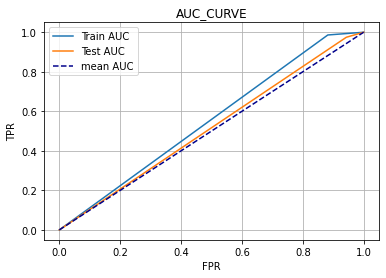

In [ ]:
plt.plot(fpr_train,tpr_train, label="Train AUC")
plt.plot(fpr,tpr,label="Test AUC")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label="mean AUC")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC_CURVE")

plt.grid()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Train Data')

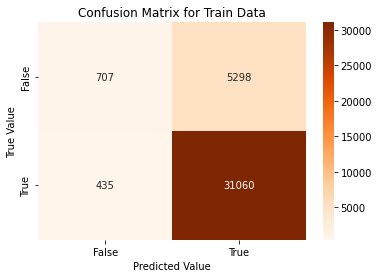

In [ ]:
con_matrix_train= confusion_matrix(y_train,y_pred_train)
ax= plt.subplot()
sns.heatmap(con_matrix_train,annot=True,fmt="d",cmap='Oranges',ax=ax)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
ax.set_xticklabels(["False","True"])
ax.set_yticklabels(["False","True"])
ax.set_title("Confusion Matrix for Train Data")

Text(0.5, 1.0, 'Confusion Matrix for Test Data')

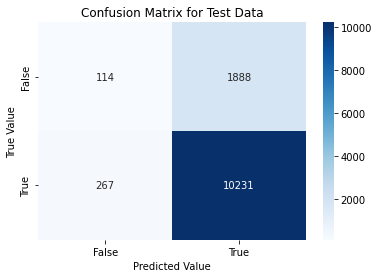

In [ ]:
con_matrix= confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(con_matrix,annot=True,fmt="d",cmap='Blues',ax=ax)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
ax.set_xticklabels(["False","True"])
ax.set_yticklabels(["False","True"])
ax.set_title("Confusion Matrix for Test Data")

In [ ]:
lis=[]
y_test=np.array(y_test)
for i in range(0,len(y_pred)):
  if ((y_pred[i]==1) and (y_test[i]==0)):
    lis.append(i)

print(len(lis))

1888


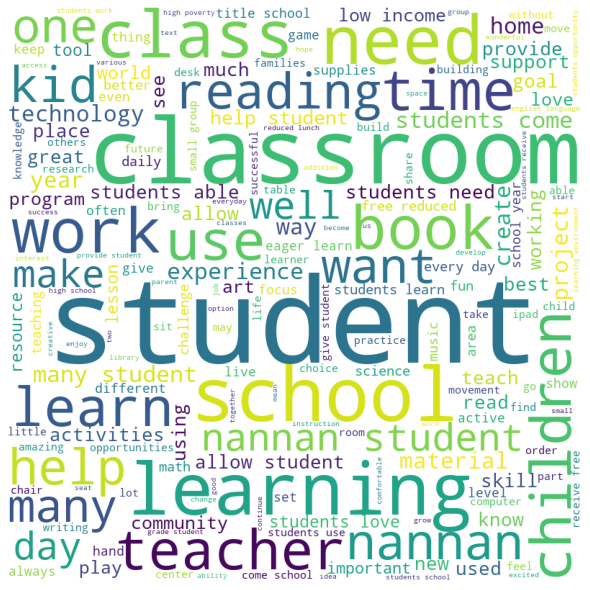

In [ ]:
essay_words = x_train['essay'].loc[x_train.index[lis]]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in essay_words:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

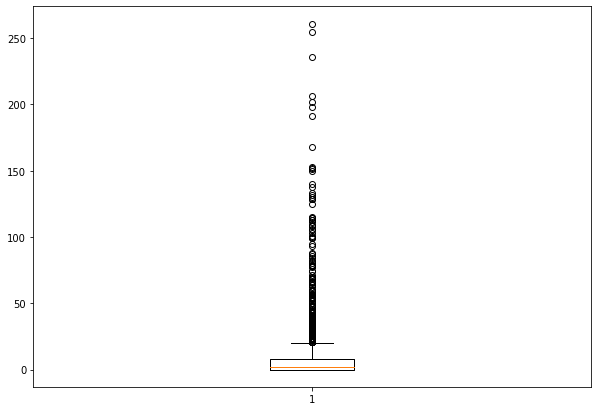

In [ ]:
number = x_train['teacher_number_of_previously_posted_projects'].loc[x_train.index[lis]]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(number)
plt.show()


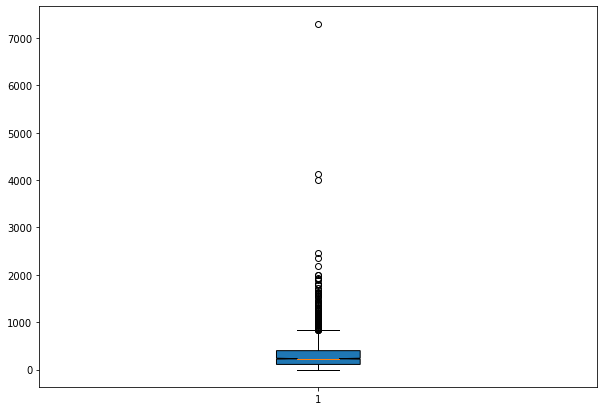

In [ ]:
number = x_train['price'].loc[x_train.index[lis]]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(number, patch_artist = True,
                notch ='True')
plt.show()


**SET2: TFIDFW2V**

In [ ]:
x_train_set2= hstack((tfidf_w2v_train,school_state_train,teacher_prefix_train,project_grade_category_train,clean_category_train,clean_subcategory_train,teacher_number_of_previously_posted_projects_train,price_scaled_train,sentiment_score_train))
x_test_set2= hstack((tfidf_w2v_test,school_state_test,teacher_prefix_test,project_grade_category_test,clean_category_test,clean_subcategory_test,teacher_number_of_previously_posted_projects_test,price_scaled_test,sentiment_score_test))

In [ ]:
classifier= DecisionTreeClassifier()
param= {"max_depth":[1,3,10,30],"min_samples_split":[5,10,100,500]}
gsv= GridSearchCV(estimator= classifier, param_grid=param, cv=5,n_jobs=-1, scoring= 'roc_auc')
gsv.fit(x_train_set2,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='roc_auc')

In [ ]:
gsv.best_params_

{'max_depth': 10, 'min_samples_split': 500}

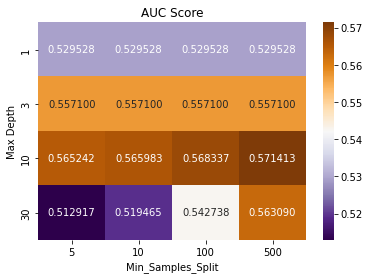

In [ ]:
result= pd.DataFrame(gsv.cv_results_)
res= result[['param_max_depth','param_min_samples_split','mean_test_score']]
score=np.array(res['mean_test_score']).reshape(4,4)
ax= plt.subplot()
sns.heatmap(score,annot= True, fmt="f",cmap='PuOr_r',xticklabels=[5,10,100,500],yticklabels=[1,3,10,30],ax=ax)
ax.set_xlabel("Min_Samples_Split")
ax.set_ylabel("Max Depth")
ax.set_title("AUC Score")
plt.show()

In [ ]:
clf2= DecisionTreeClassifier(max_depth=10,min_samples_split=500, random_state=20)
clf2.fit(x_train_set2,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500, random_state=20)

In [ ]:
y_pred_train= clf2.predict(x_train_set2)
fpr_train,tpr_train,threshold= roc_curve(y_train,y_pred_train)
auc_score_train= auc(fpr_train,tpr_train)
print(auc_score_train)

0.5077506586496753


In [ ]:
temp= np.multiply(tpr_train,np.subtract(1,fpr_train))
index= np.argmax(temp)
best_threshold= threshold[index]

In [ ]:
y_pred= clf2.predict(x_test_set2)
fpr,tpr,threshold= roc_curve(y_test,y_pred)
auc_score= auc(fpr,tpr)
print(auc_score)

0.49901022962558494


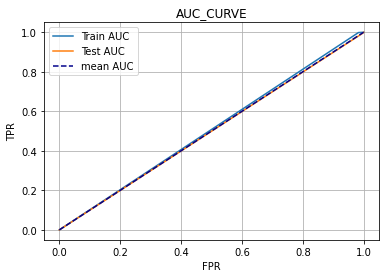

In [ ]:
plt.plot(fpr_train,tpr_train, label="Train AUC")
plt.plot(fpr,tpr,label="Test AUC")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label="mean AUC")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC_CURVE")

plt.grid()
plt.show()

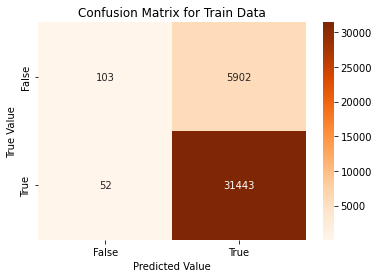

In [ ]:
con_matrix_train= confusion_matrix(y_train,y_pred_train)
ax= plt.subplot()
sns.heatmap(con_matrix_train,annot=True,fmt="d",cmap='Oranges',ax=ax)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
ax.set_xticklabels(["False","True"])
ax.set_yticklabels(["False","True"])
ax.set_title("Confusion Matrix for Train Data")
plt.show()

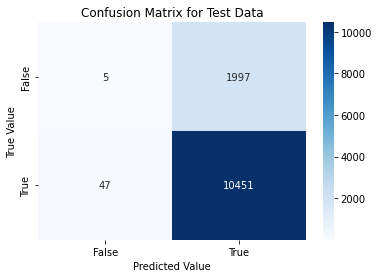

In [ ]:
con_matrix= confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(con_matrix,annot=True,fmt="d",cmap='Blues',ax=ax)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
ax.set_xticklabels(["False","True"])
ax.set_yticklabels(["False","True"])
ax.set_title("Confusion Matrix for Test Data")
plt.show()

In [ ]:
lis=[]
y_test=np.array(y_test)
for i in range(0,len(y_pred)):
  if ((y_pred[i]==1) and (y_test[i]==0)):
    lis.append(i)

print(len(lis))

1997


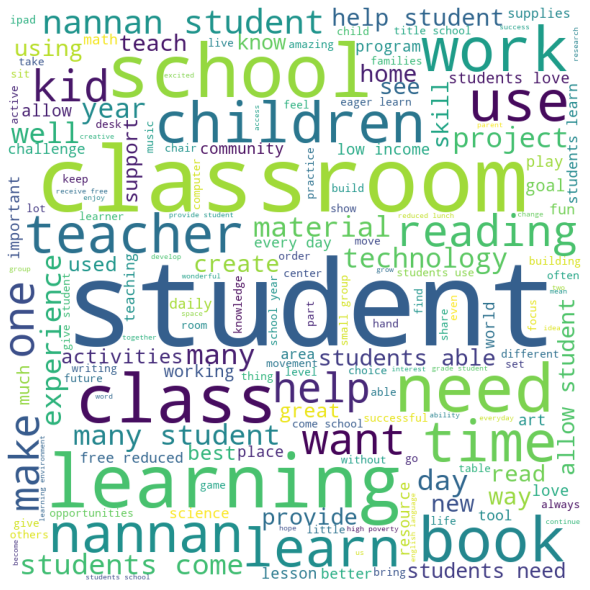

In [ ]:
essay_words = x_train['essay'].loc[x_train.index[lis]]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in essay_words:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

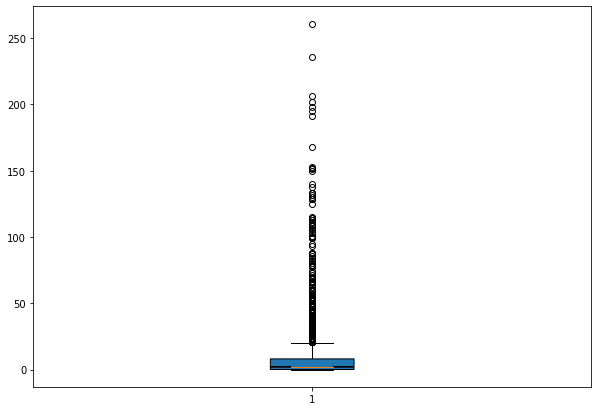

In [ ]:
number = x_train['teacher_number_of_previously_posted_projects'].loc[x_train.index[lis]]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(number,patch_artist = True,notch ='True')
plt.show()


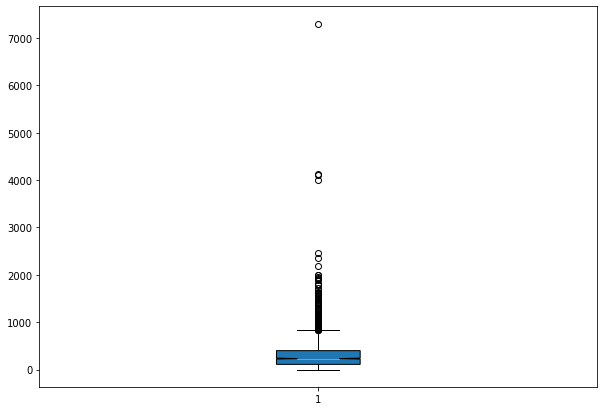

In [ ]:
number = x_train['price'].loc[x_train.index[lis]]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(number, patch_artist = True,
                notch ='True')
plt.show() 

# <font color='red'> <b>Task - 2</b></font>

TASK 2-Training on important features on DATASET1

In [ ]:
feature= clf.feature_importances_

In [ ]:
feature

array([0.       , 0.       , 0.       , ..., 0.0068047, 0.       ,
       0.       ])

In [ ]:
index= np.argwhere(feature)

In [ ]:
len(index)

309

In [ ]:
final_feature=[]
for i in index:
  for j in i:
    final_feature.append(j)


print(len(final_feature))


309


In [ ]:

x_train_new=x_train_set1.tocsr()[:,final_feature].todense()
print(x_train_new.shape)

x_test_new=x_test_set1.tocsr()[:,final_feature].todense()
print(x_test_new.shape)

(37500, 309)
(12500, 309)


In [ ]:
classifier= DecisionTreeClassifier()
param= {"max_depth":[1,3,10,30],"min_samples_split":[5,10,100,500]}
gsv= GridSearchCV(estimator= classifier, param_grid=param, cv=5,n_jobs=-1, scoring= 'roc_auc')
gsv.fit(x_train_new,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='roc_auc')

In [ ]:
gsv.best_params_

{'max_depth': 30, 'min_samples_split': 500}

In [ ]:
gsv.best_score_

0.6367396778284065

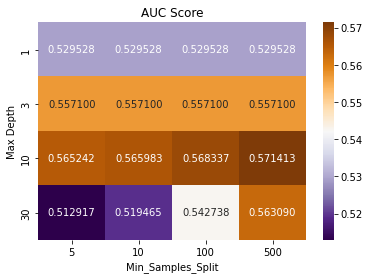

In [ ]:
score= pd.DataFrame(gsv.cv_results_)
score= score[['param_max_depth','param_min_samples_split','mean_test_score']]
score=np.array(score['mean_test_score']).reshape(4,4)
ax= plt.subplot()
sns.heatmap(score,annot= True, fmt="f",cmap='PuOr_r',xticklabels=[5,10,100,500],yticklabels=[1,3,10,30],ax=ax)
ax.set_xlabel("Min_Samples_Split")
ax.set_ylabel("Max Depth")
ax.set_title("AUC Score")
plt.show()

In [ ]:
classifier= DecisionTreeClassifier(max_depth=30,min_samples_split=500, random_state=20)
classifier.fit(x_train_new,y_train)
y_predict_train= classifier.predict(x_train_new)
y_predict_test= classifier.predict(x_test_new)

In [ ]:
fpr_train,tpr_train,threshold= roc_curve(y_train,y_predict_train)
auc_score_train= auc(fpr_train,tpr_train)
print(auc_score_train)

0.6157091136546924


In [ ]:
fpr_test,tpr_test,threshold= roc_curve(y_test,y_predict_test)
auc_score_test= auc(fpr_test,tpr_test)
print(auc_score_test)

0.5279294909700701


In [ ]:
con_matrix= confusion_matrix(y_train,y_predict_train)
print(con_matrix)

[[ 1534  4471]
 [  757 30738]]


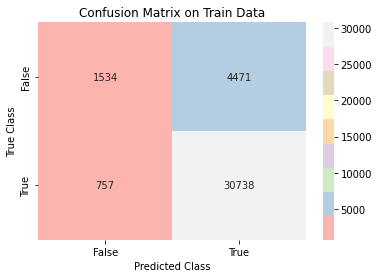

In [ ]:
axis= plt.subplot()
sns.heatmap(con_matrix,fmt='d',annot=True,cmap='Pastel1',ax=axis)
axis.set_title("Confusion Matrix on Train Data")
axis.set_xlabel("Predicted Class")
axis.set_ylabel("True Class")
axis.set_xticklabels(["False","True"])
axis.set_yticklabels(["False","True"])
plt.show()

In [ ]:
con_matrix_test= confusion_matrix(y_test,y_predict_test)
print(con_matrix_test)

[[ 215 1787]
 [ 541 9957]]


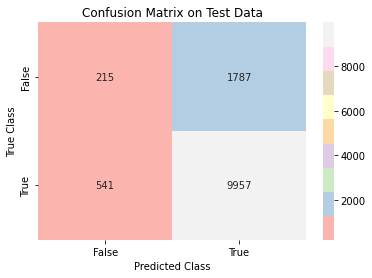

In [ ]:
axis= plt.subplot()
sns.heatmap(con_matrix_test,fmt='d',annot=True,cmap='Pastel1',ax=axis)
axis.set_title("Confusion Matrix on Test Data")
axis.set_xlabel("Predicted Class")
axis.set_ylabel("True Class")
axis.set_xticklabels(["False","True"])
axis.set_yticklabels(["False","True"])
plt.show()

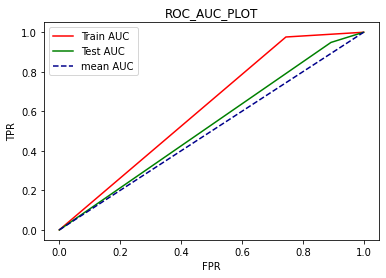

In [ ]:
plt.plot(fpr_train,tpr_train,color='Red',label="Train AUC")
plt.plot(fpr_test,tpr_test,color='Green',label="Test AUC")
plt.plot([0,1],[0,1],color='darkblue', linestyle='--',label="mean AUC")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC_PLOT")
plt.show()
